In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

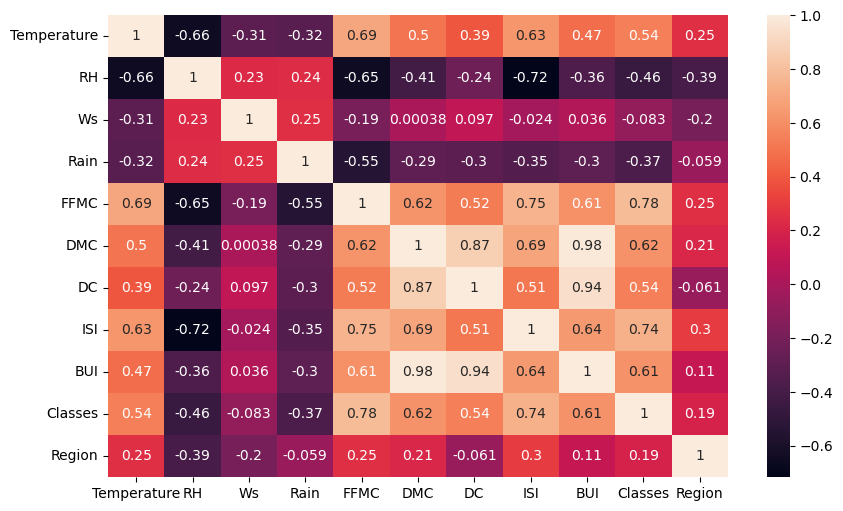

In [19]:
# Check for multicollinearity

plt.figure(figsize=(10,6))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(X_train,0.85)

In [23]:
# Drop features when correlation more than 0.85

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling and Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [25]:
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_trained_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Box plots to understand Effect of Standard Scaler

Text(0.5, 1.0, 'X_train after scaling')

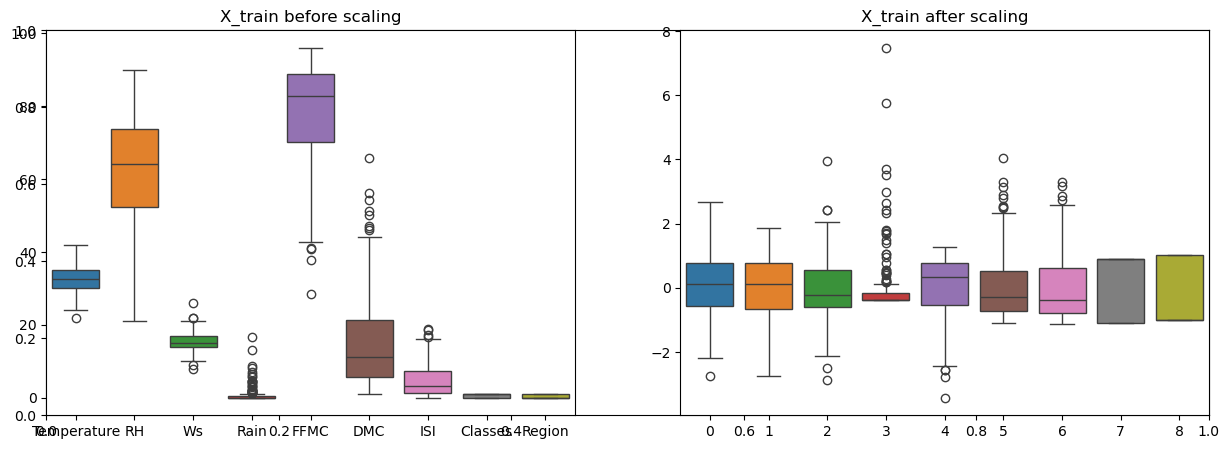

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_trained_scaled)
plt.title('X_train after scaling')

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [31]:
lr = LinearRegression()

Mean absolute error: 0.5468236465249993
R2 score: 0.9847657384266951


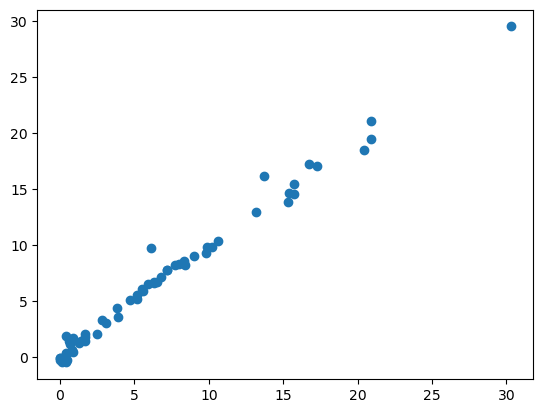

In [34]:
lr.fit(X_trained_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean absolute error: 1.1331759949144085
R2 score: 0.9492020263112388


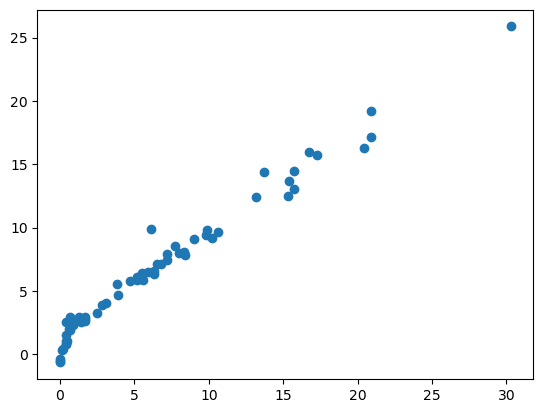

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_trained_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

## Ridge Regression

Mean absolute error: 0.5642305340105715
R2 score: 0.9842993364555513


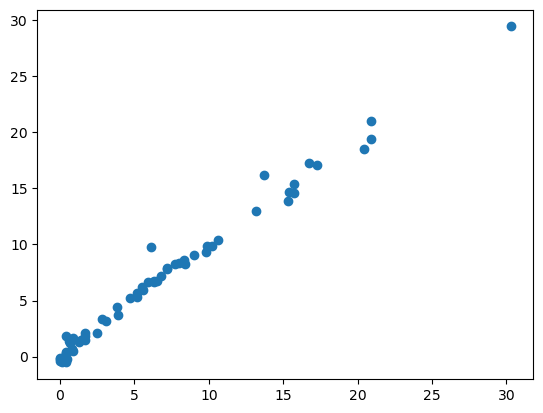

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_trained_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

## Cross Validation Using Lasso 

Mean absolute error: 0.6199701158263432
R2 score: 0.9820946715928275


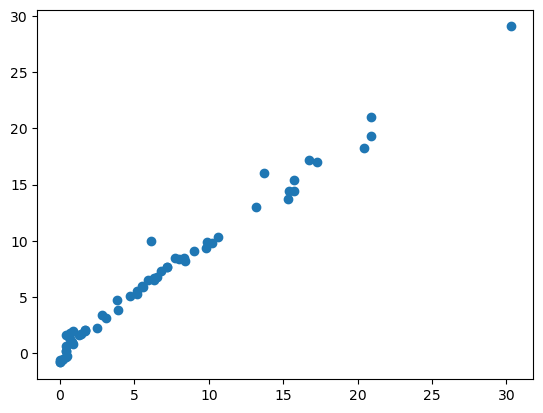

In [39]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_trained_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

## Cross Validation Using Ridge Regression

Mean absolute error: 0.5642305340105715
R2 score: 0.9842993364555513


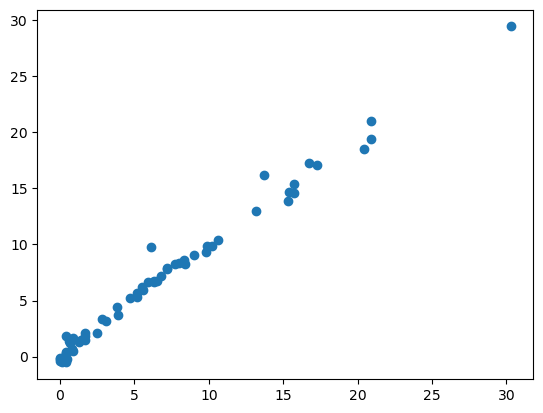

In [40]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_trained_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

## Elastic Net

Mean absolute error: 1.8822353634896
R2 score: 0.8753460589519703


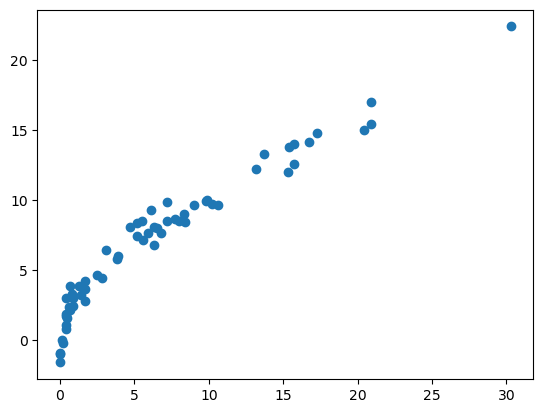

In [37]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_trained_scaled,y_train)
y_pred = en.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

## Cross Validation Using Elastic Net

Mean absolute error: 0.6575946731430905
R2 score: 0.9814217587854941


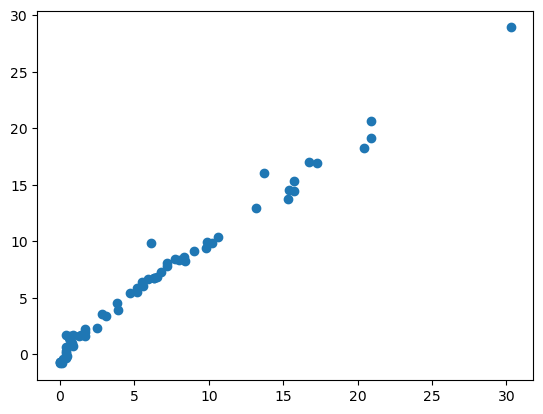

In [41]:
from sklearn.linear_model import ElasticNetCV

encv = ElasticNetCV(cv=5)
encv.fit(X_trained_scaled,y_train)
y_pred = encv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print("R2 score:",score)
plt.scatter(y_test,y_pred)

In [ ]:
# Pickle machine learning model and preprocessing model

In [42]:
scaler

StandardScaler()

In [43]:
ridge

Ridge()

In [44]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))